<a href="https://colab.research.google.com/github/Rodolphenkerbu/Abalone/blob/main/MNIST_CNN_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################
# Install Required Package for deep learning models CNN,RNN,GANS
############################
!pip install --upgrade scikeras
# Installs SciKeras to enable Keras models to work with scikit-learn tools like GridSearchCV.
############################
# Import Libraries
############################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
# Loads essential libraries for model building, data preprocessing, visualization, and evaluation.

In [ ]:
############################
# Set Random Seed for Reproducibility
############################
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
# Ensures consistent results across runs by fixing randomness in NumPy, TensorFlow, and Python’s random module.

In [ ]:
############################
# Load and Preprocess MNIST Data
############################

# Load the MNIST dataset using Keras's built-in utility.
# This dataset is bundled with Keras and will be automatically downloaded the first time it's accessed.
# After that, it's cached locally so future runs load instantly.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the image data to include a channel dimension.
# CNNs expect input in the format (height, width, channels), and MNIST is grayscale (1 channel).
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32")

# Normalize pixel values from [0, 255] to [0, 1].
# This improves training stability and speeds up convergence.
x_train /= 255.0
x_test /= 255.0

# Convert integer labels (e.g., 7 → [0,0,0,0,0,0,0,1,0,0]) to one-hot encoded vectors.
# This format is required for categorical classification using softmax output.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Loads MNIST dataset, reshapes images for CNN input, normalizes pixel values, and one-hot encodes labels.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
############################
# Build the CNN Model
############################
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Defines a basic CNN architecture with convolutional, pooling, and dense layers for digit classification.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
############################
# Compile the Model
############################
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Configures the model with Adam optimizer and categorical crossentropy loss for multiclass classification.

In [ ]:
############################
# Train the Model
#An epoch is one full pass through the entire training dataset during model training.
#In each epoch, the neural network sees every sample once, makes predictions,
#calculates errors, and updates its weights to improve accuracy. Multiple epochs
#allow the model to gradually learn patterns and refine its predictions over time.

############################
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)
# Trains the model for 10 epochs using mini-batches and reserves 10% of training data for validation.

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.8659 - loss: 0.4917 - val_accuracy: 0.9840 - val_loss: 0.0581
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9807 - loss: 0.0617 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9874 - loss: 0.0407 - val_accuracy: 0.9888 - val_loss: 0.0375
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9932 - loss: 0.0226 - val_accuracy: 0.9912 - val_loss: 0.0355
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9954 - loss: 0.0171 - val_accuracy: 0.9885 - val_loss: 0.0387
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9957 - loss: 0.0146 - val_accuracy: 0.9887 - val_loss: 0.0423
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9965 - loss: 0.0121 - 

In [ ]:
############################
# Evaluate on Test Data
############################
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
# Evaluates model performance on unseen test data and prints final accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0495
Test Accuracy: 0.9906


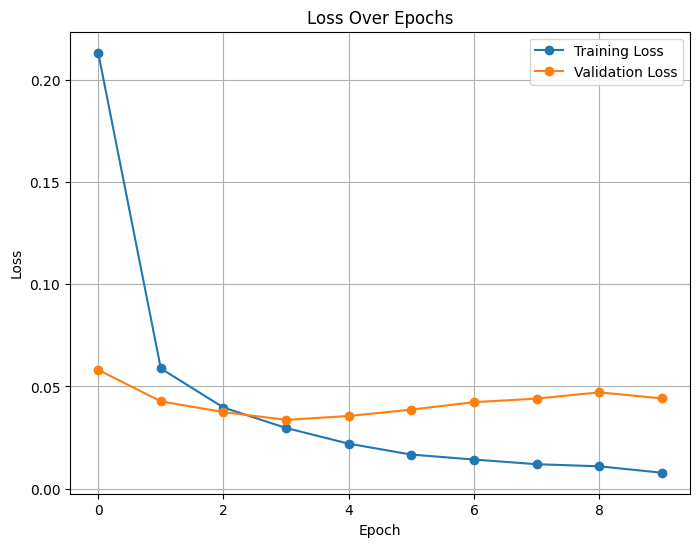

In [ ]:
############################
# Plot Loss Over Epochs
#Loss over epochs shows how the model’s error decreases as it learns from the data over time.
############################
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
# Visualizes training and validation loss across epochs to assess learning behavior.

In [ ]:
############################
# Generate Predictions and Evaluate
############################
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(report)
# Generates predictions, converts one-hot labels to class indices, and prints accuracy and detailed metrics.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.9906
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



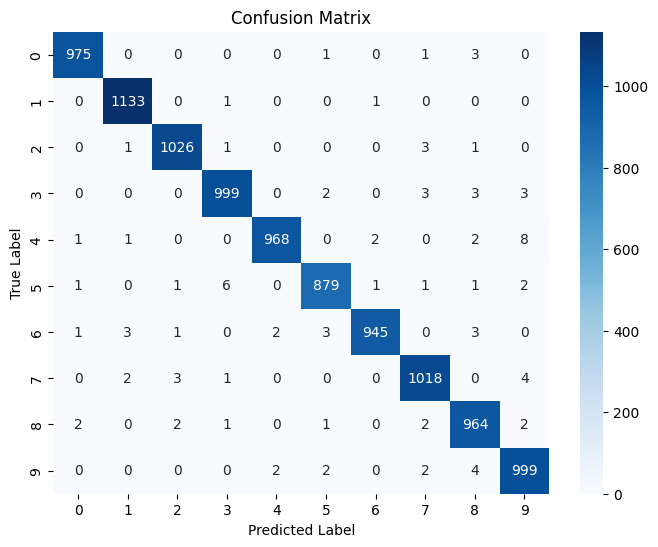

In [ ]:
############################
# Plot Confusion Matrix
# A confusion matrix shows how often predictions are true or false by comparing
# actual labels to predicted ones—highlighting true positives, true negatives,
# false positives, and false negatives.

############################
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Displays a heatmap showing correct and incorrect predictions for each digit class.

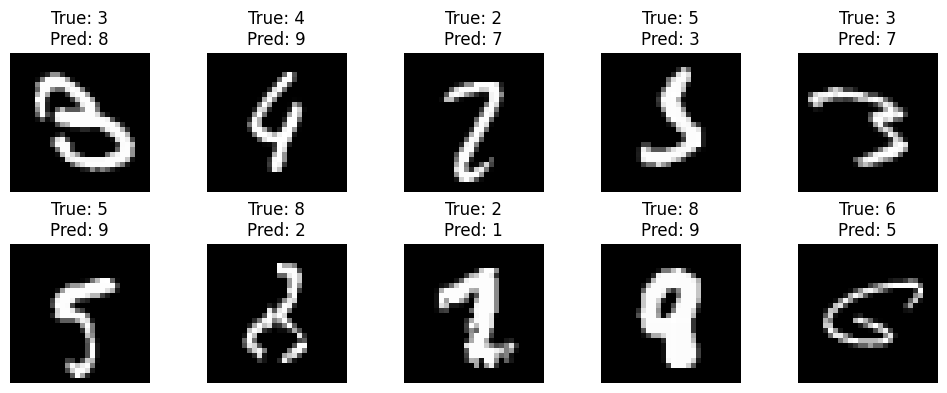

In [ ]:
################################################################################
# Visualize Misclassified Digits
################################################################################
################################################################################
# Visualizing misclassified digits helps you see which inputs the model got
#wrong—revealing patterns in false predictions and guiding model improvement.
################################################################################
#It means you're looking at the actual images the model got wrong — the ones where
#its prediction didn’t match the true label. By visualizing these misclassified
#digits, you can spot patterns in the model’s mistakes (like confusing 3s with 5s),
#which helps you understand where it struggles and how to improve it. It’s a
#diagnostic tool for model performance.
################################################################################
misclassified_indices = np.where(y_pred_classes != y_true)[0]

num_to_display = 10
plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified_indices[:num_to_display]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
# Displays the first 10 misclassified digits to visually inspect model errors and guide future improvements.